### Annotations
- An annotation is defined by an onset, a duration, and a string description
>events:
>
>Events correspond to specific time points in raw data; e.g., triggers, experimental condition events, etc. MNE represents events with integers that are stored in numpy arrays of shape (n_events, 3). Such arrays are classically obtained from a trigger channel, also referred to as stim channel.

>annotations:
>
>An annotation is defined by an onset, a duration, and a string description. It can contain information about the experiment, but also details on signals marked by a human: bad data segments, sleep scores, sleep events (spindles, K-complex) etc.

[details](https://martinos.org/mne/stable/auto_tutorials/plot_object_annotations.html#sphx-glr-auto-tutorials-plot-object-annotations-py)

### An example of events and annotations

In [3]:
import os.path as op
import numpy as np
import mne
from mne.datasets import sample

In [4]:
# Load the data
data_path = sample.data_path()
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(fname)

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0


In [24]:
raw.info

<Info | 24 non-empty fields
    acq_pars : unicode | 13886 items
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (EOG: 1, EEG: 60, STIM: 9, GRAD: 204, MAG: 102)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : unicode | 49 items
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 1 items
    experimenter : unicode | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 172.176300049 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : unicode | 4 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off
    sfreq : float | 600.614990234 Hz
    acq_stim : NoneType
    ctf_head_t : NoneType
   

In [5]:
# # extract the events array from the stim channel
events = mne.find_events(raw)
events

320 events found
Event IDs: [ 1  2  3  4  5 32]


array([[ 27977,      0,      2],
       [ 28345,      0,      3],
       [ 28771,      0,      1],
       [ 29219,      0,      4],
       [ 29652,      0,      2],
       [ 30025,      0,      3],
       [ 30450,      0,      1],
       [ 30839,      0,      4],
       [ 31240,      0,      2],
       [ 31665,      0,      3],
       [ 32101,      0,      1],
       [ 32519,      0,      4],
       [ 32935,      0,      2],
       [ 33325,      0,      3],
       [ 33712,      0,      1],
       [ 34089,      0,      5],
       [ 34532,      0,      2],
       [ 34649,      0,     32],
       [ 34956,      0,      3],
       [ 35428,      0,      1],
       [ 35850,      0,      4],
       [ 36211,      0,      2],
       [ 36576,      0,      3],
       [ 37007,      0,      1],
       [ 37460,      0,      4],
       [ 37910,      0,      2],
       [ 38326,      0,      3],
       [ 38711,      0,      1],
       [ 39130,      0,      4],
       [ 39563,      0,      2],
       [ 3

In [6]:
# Specify event_id dictionary based on the meaning of experimental triggers
event_id = {'Auditory/Left': 1, 'Auditory/Right': 2,
            'Visual/Left': 3, 'Visual/Right': 4,
            'smiley': 5, 'button': 32}
color = {1: 'green', 2: 'yellow', 3: 'red', 4: 'c', 5: 'black', 32: 'blue'}


In [9]:
print("sfreq",raw.info['sfreq'])
print("first_samp:",raw.first_samp) #The first data sample.,https://martinos.org/mne/stable/generated/mne.io.Raw.html#mne.io.Raw.first_samp

('sfreq', 600.614990234375)
('first_samp:', 25800)


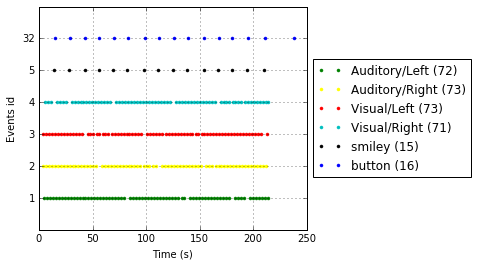

In [8]:
mne.viz.plot_events(events,raw.info['sfreq'],raw.first_samp,color=color,
                   event_id=event_id);

### Working with Annotations
- manipulate some simulated annotations

In [10]:
# Create an annotation object with orig_time undefined (default)
annot_none = mne.Annotations(onset=[0,2,9],duration=[0.5,4,0],
                            description=['foo','bar','foo'],
                            orig_time=None)
print(annot_none)

<Annotations  |  3 segments : bar (1), foo (2), orig_time : None>


In [11]:
# Create an annotation object with orig_time
orig_time = '2002-12-03 19:01:31.676071'
annot_orig = mne.Annotations(onset=[22, 24, 31], duration=[0.5, 4, 0],
                             description=['foo', 'bar', 'foo'],
                             orig_time=orig_time)
print(annot_orig)

<Annotations  |  3 segments : bar (1), foo (2), orig_time : 2002-12-03 19:01:31.676071>


In [12]:
#  create two raw objects and set each with different annotations
raw_a = raw.copy().crop(tmax=12).set_annotations(annot_none)
raw_b = raw.copy().crop(tmax=12).set_annotations(annot_orig)

In [17]:
raw_a

<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 7208 (12.0 sec), ~3.8 MB, data not loaded>

In [19]:
# Show the annotations in the raw objects
print(raw_a.annotations)
print(raw_b.annotations)

<Annotations  |  3 segments : bar (1), foo (2), orig_time : 2002-12-03 19:01:10.720100>
<Annotations  |  3 segments : bar (1), foo (2), orig_time : 2002-12-03 19:01:10.720100>


In [20]:
# Show that the onsets are the same
np.set_printoptions(precision=6)
print(raw_a.annotations.onset)
print(raw_b.annotations.onset)

[ 42.955971  44.955971  51.955971]
[ 42.955971  44.955971  51.955971]


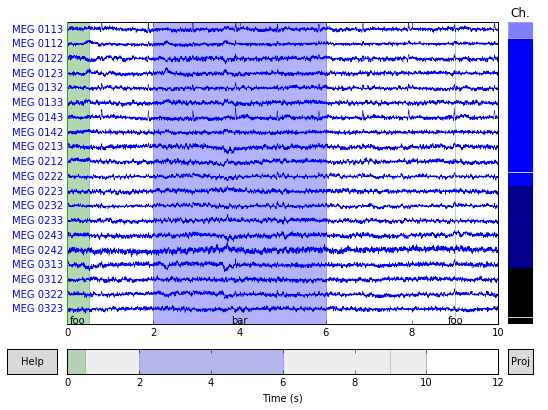

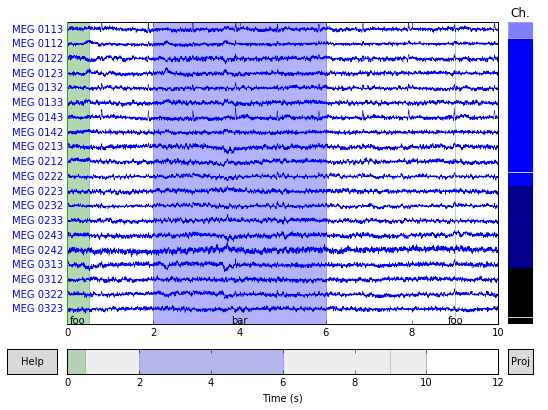

In [18]:
# Plot the raw objects
raw_a.plot();
raw_b.plot();

Note that although the onset values of both annotations were different, due to complementary orig_time they are now identical. This is because the first one (annot_none), once set in raw, adopted its orig_time. The second one (annot_orig) already had an orig_time, so its orig_time was changed to match the onset time of the raw. Changing an already defined orig_time of annotations caused its onset to be recalibrated with respect to the new orig_time. As a result both annotations have now identical onset and identical orig_time:

In [21]:
#Notice again that for the case where orig_time is None, it is assumed that the orig_time is the time of the first sample of data.
raw_delta = (1 / raw.info['sfreq'])
print('raw.first_sample is {}'.format(raw.first_samp * raw_delta))
print('annot_none.onset[0] is {}'.format(annot_none.onset[0]))
print('raw_a.annotations.onset[0] is {}'.format(raw_a.annotations.onset[0]))

raw.first_sample is 42.9559708291
annot_none.onset[0] is 0.0
raw_a.annotations.onset[0] is 42.9559708834


### Concatenate Two Annotations

In [22]:
annot = mne.Annotations(onset=[10],duration=[0.5],
                       description=['foobar'],
                       orig_time=orig_time)
annot = annot_orig + annot # concatenate
print(annot)

<Annotations  |  4 segments : bar (1), foo (3), foobar (1), orig_time : 2002-12-03 19:01:31.676071>


### Save annotations

In [ ]:
# FIF fotmat
annot.save('my-annot.fif')
# CSV with onsets in ISO timestamps
annot.save('my-annot.csv')
# Plain text
annot.save('my-annot.txt')

### Reference
- https://martinos.org/mne/stable/generated/mne.Annotations.html#mne.Annotations
- https://martinos.org/mne/stable/auto_tutorials/plot_object_annotations.html#sphx-glr-auto-tutorials-plot-object-annotations-py